<a href="https://colab.research.google.com/github/abdullatifm1127/PCVK_GANJIL_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


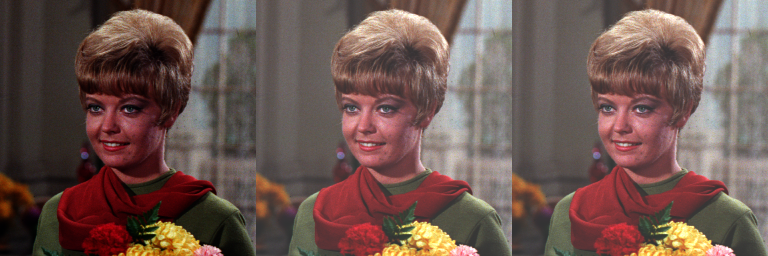

In [17]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    brightness = 0

original = cv2.imread('/content/drive/MyDrive/Tugas PCVK/female.tiff')

# Cek apakah gambar berhasil dibaca
if original is None:
    print("Error: Gambar tidak ditemukan atau path salah.")
else:
    brightness_image = np.zeros(original.shape, dtype=np.uint8)

    temp = original.astype(np.int16)  # cegah overflow

    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                brightness_image[y, x, c] = np.clip(temp[y, x, c] + brightness, 0, 255)

    # Gabungkan hasil untuk dibandingkan
    final_frame = cv2.hconcat([original, brightness_image, brightness_image_fast])
    cv2_imshow(final_frame)


**TUGAS PRAKTIKUM D1**

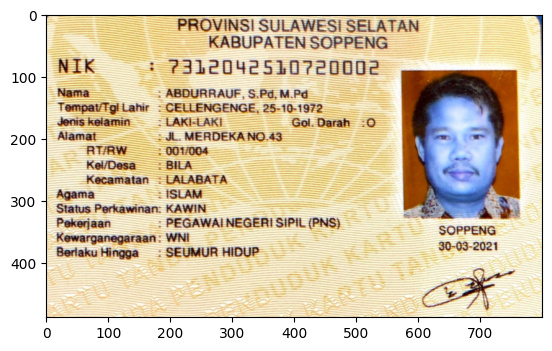

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
original = cv2.imread('/content/drive/MyDrive/Tugas PCVK/KTP7.jpeg')
plt.imshow(original)